# 1. Summary

#### Aim:
It is of our interest to explore and understand the relationship between flower species and its morphological features (such as length and width). Particularly, it is of interst to understand if there is any association between length, width and Iris flower species.

#### Data:

Iris, a multivariate data set, with five (5) variables and 150 samples were used for this analysis.

#### Method:

Exploratory data analysis was conducted. No major concerns with the data quality. The species name column had whitespace and it was cleaned.

#### Results and findings:

- It appears that Versicolor and Virginica have similar features and that they are bigger compared to Setosa.
- The sepal features - length and width are negatively correlated (-0.12), and petal features are positively correlated (0.96).


# 2. Technical notes

### Exploratory data analysis

In [25]:
!python --version

# import libraries

import pandas as pd
import numpy as np
import scipy


import matplotlib.pyplot as plt
import seaborn as sb


Python 3.11.2


##### Read in the data 

In [26]:
data = pd.read_excel('\DATA\Iris.xls')

##### Inspect the data

In [27]:
# view top 5 rows
data.head(5)

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa


In [28]:
# view bottom 5 rows
data.tail(5)

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica
149,3,1.8,5.1,3.0,5.9,Verginica


In [29]:
# shape
data.shape

(150, 6)

In [30]:
# information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species_No    150 non-null    int64  
 1   Petal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Sepal_width   150 non-null    float64
 4   Sepal_length  150 non-null    float64
 5   Species_name  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
# missing values
data.isna().sum()

Species_No      0
Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
Species_name    0
dtype: int64

In [32]:
# missing values
data.isnull().sum()

Species_No      0
Petal_width     0
Petal_length    0
Sepal_width     0
Sepal_length    0
Species_name    0
dtype: int64

In [33]:
# unique values in categorical variable
data['Species_name'].nunique()


3

In [34]:
# unique values in categorical variable
data['Species_name'].unique()

array([' Setosa', ' Versicolor', ' Verginica'], dtype=object)

In [35]:
# unique value count in categorical variable
data.Species_name.value_counts()

Species_name
Setosa        50
Versicolor    50
Verginica     50
Name: count, dtype: int64

Comments:

- The data set has 150 observations and six variables.
    - The four (4) variables, namely, Sepal_length, Sepal_width, Petal_length and Petal_width are continuous numeric variables, and represent the morphological features of a flower in centimetres (cms).
    - The variable, Species_name is a categorical variable of nominal type and it contains the flower species - Setosa, Versicolor and Virginica.
    - The variable - Species_No is not important for this study, as it contains the record ID or count.

Data quality:
- There are no missing data.
- We could drop the column Species_No, remove the whitespace before species names, and correct the typo to set Verginica to Virginica.


In [36]:
# changes to the data set

# remove species_no column
data = data.drop(['Species_No'], axis=1)

# remove whitespace from species names
data['Species_name'] = data['Species_name'].str.strip()

# set verginica to virginica
data.loc[data['Species_name'] == 'Verginica', 'Species_name'] = 'Virginica'

##### Descriptive statistics

In [37]:
data.describe()

,Petal_width,Petal_length,Sepal_width,Sepal_length
count,150.000000,150.000000,150.000000,150.000000
mean,1.199333,3.758000,3.057333,5.843333
std,0.762238,1.765298,0.435866,0.828066
min,0.100000,1.000000,2.000000,4.300000
25%,0.300000,1.600000,2.800000,5.100000
50%,1.300000,4.350000,3.000000,5.800000
75%,1.800000,5.100000,3.300000,6.400000
max,2.500000,6.900000,4.400000,7.900000


In [38]:
# species - setosa
print("Setosa")
print(data[data['Species_name'] == 'Setosa'].describe())

# species - versicolor
print("Versicolor")
print(data[data['Species_name'] == 'Versicolor'].describe())

# species - virginica
print("Virginica")
print(data[data['Species_name'] == 'Virginica'].describe())


Setosa
       Petal_width  Petal_length  Sepal_width  Sepal_length
count    50.000000     50.000000    50.000000      50.00000
mean      0.246000      1.462000     3.428000       5.00600
std       0.105386      0.173664     0.379064       0.35249
min       0.100000      1.000000     2.300000       4.30000
25%       0.200000      1.400000     3.200000       4.80000
50%       0.200000      1.500000     3.400000       5.00000
75%       0.300000      1.575000     3.675000       5.20000
max       0.600000      1.900000     4.400000       5.80000
Versicolor
       Petal_width  Petal_length  Sepal_width  Sepal_length
count    50.000000     50.000000    50.000000     50.000000
mean      1.326000      4.260000     2.770000      5.936000
std       0.197753      0.469911     0.313798      0.516171
min       1.000000      3.000000     2.000000      4.900000
25%       1.200000      4.000000     2.525000      5.600000
50%       1.300000      4.350000     2.800000      5.900000
75%       1.500000    

Comments:

- The mean petal length and sepal length of Virginica appears to be bigger than other species.
- The mean petal width of Setosa is the smallest compared to other species.
- The SD of all species look reasonably okay less than 1.

##### Visual exploratory analysis

Univariate analysis

Text(0.5, 0, 'Size in cms')

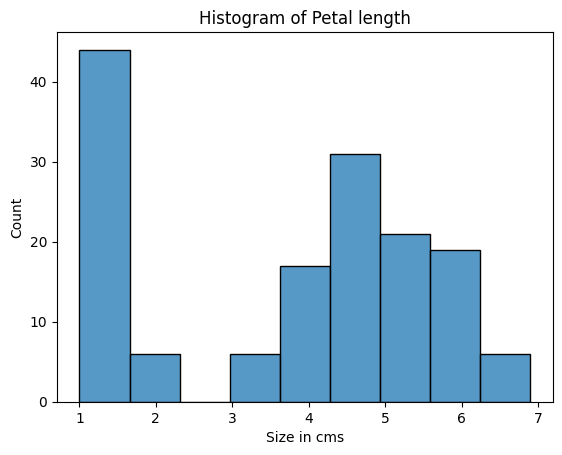

In [39]:
sb.histplot(data['Petal_length'])
plt.title('Histogram of Petal length')
plt.xlabel('Size in cms')

Text(0.5, 0, 'Size in cms')

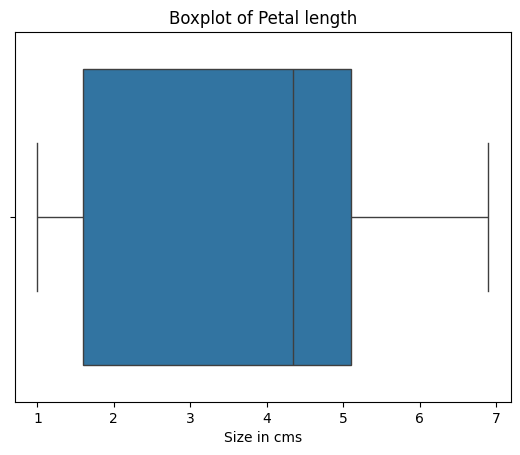

In [40]:
sb.boxplot(data['Petal_length'], orient='h')
plt.title('Boxplot of Petal length')
plt.xlabel('Size in cms')

In [41]:
# Calculate the skewness 
print(scipy.stats.skew(data['Petal_length'], axis=0, bias=True))

-0.2721276664567214


Comments:
- Shape and distribution: Somewhat normal distribution, otherwise no major concerns.
- Skewness: Slight left-skewness.
- Modality: There appears to be two modes.

Multivariate analysis

Text(0.5, 0, 'Size in cms')

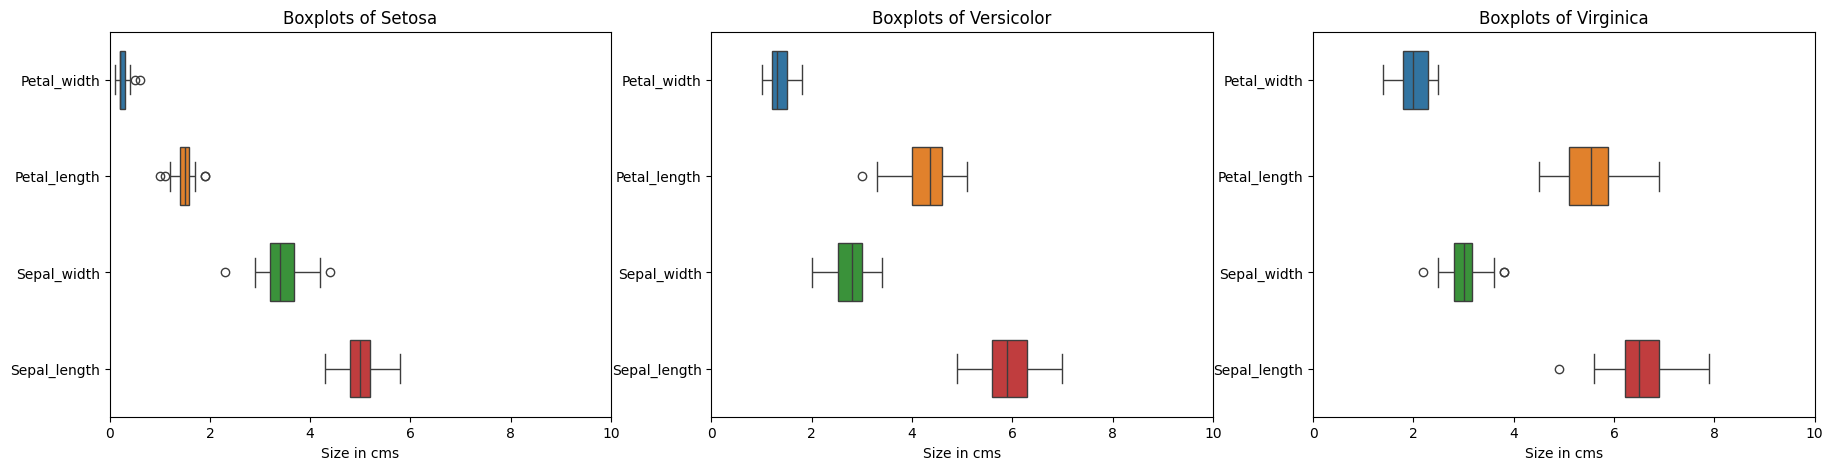

In [42]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22, 5))

# Setosa
sb.boxplot(data = data[data['Species_name'] == 'Setosa'], 
           orient='h',
           width=0.6, 
           ax = axes[0])
axes[0].set_title('Boxplots of Setosa')
axes[0].set_xlim(0,10)
axes[0].set_xlabel('Size in cms', fontsize = 10)

# Versicolor
sb.boxplot(data = data[data['Species_name'] == 'Versicolor'], 
           orient='h',
           width=0.6,
           ax = axes[1])
axes[1].set_title('Boxplots of Versicolor')
axes[1].set_xlim(0,10)
axes[1].set_xlabel('Size in cms', fontsize = 10)

# Virginica
sb.boxplot(data = data[data['Species_name'] == 'Virginica'], 
           orient='h',
           width=0.6,
           ax = axes[2])
axes[2].set_title('Boxplots of Virginica')
axes[2].set_xlim(0,10)
axes[2].set_xlabel('Size in cms', fontsize = 10)


Comments:
- Setosa: the median sepal length and width are bigger compared to petal features. Also there are couple of outliers in sepal width.
- Versicolor: the median petal and sepal length appears to be bigger for Versicolor compared to width of petal and sepal. 
- Virginica: similar to Versicolor, the median petal and sepal length appears to be bigger for Virginica. There appears to be few outliers in sepal width and length.

Overall
- Versicolor and Virginica appears to be bigger flowers than Setosa.


##### Pairs plot

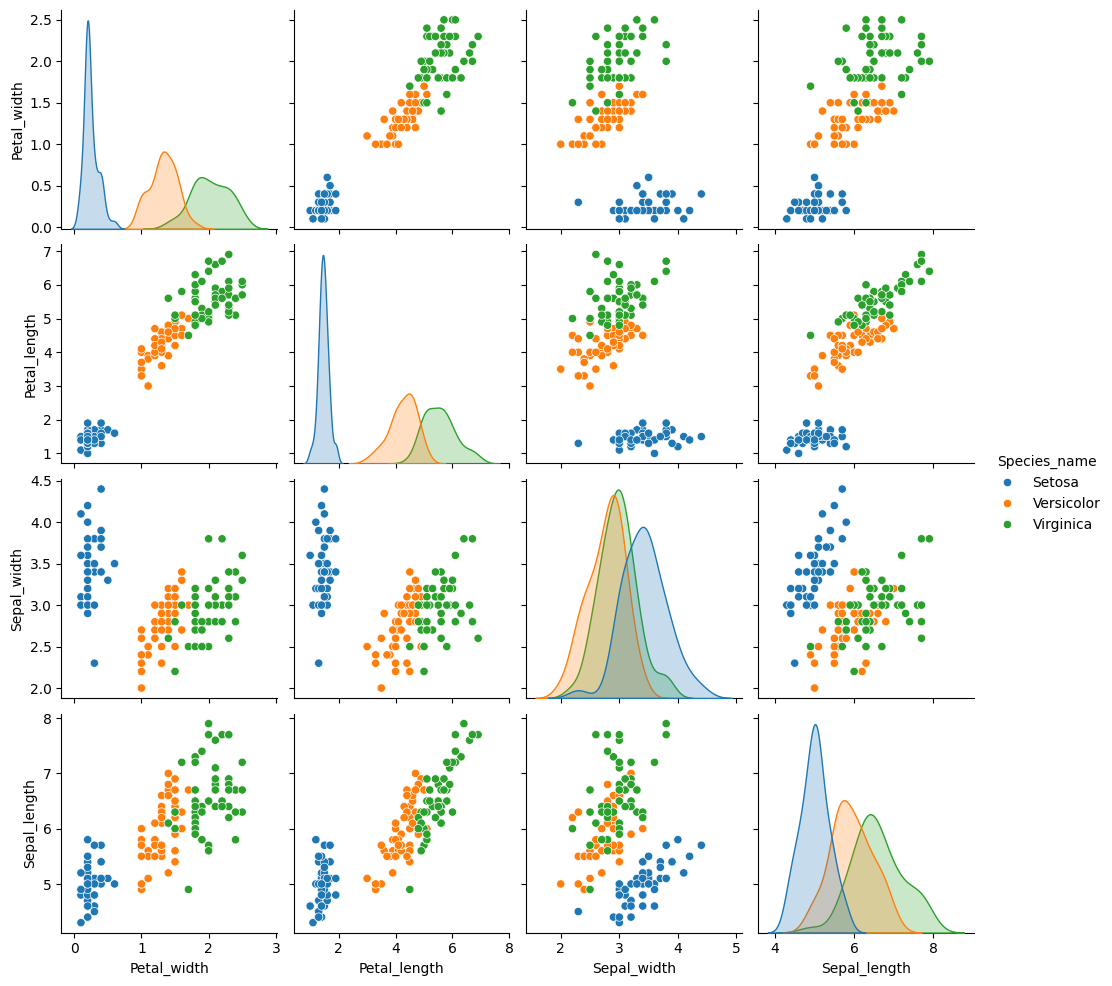

In [43]:
sb.pairplot(data,
            hue="Species_name")


##### Correlation

In [44]:
data[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']].corr(method='pearson')

,Sepal_length,Sepal_width,Petal_length,Petal_width
Sepal_length,1.000000,-0.117570,0.871754,0.817941
Sepal_width,-0.117570,1.000000,-0.428440,-0.366126
Petal_length,0.871754,-0.428440,1.000000,0.962865
Petal_width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

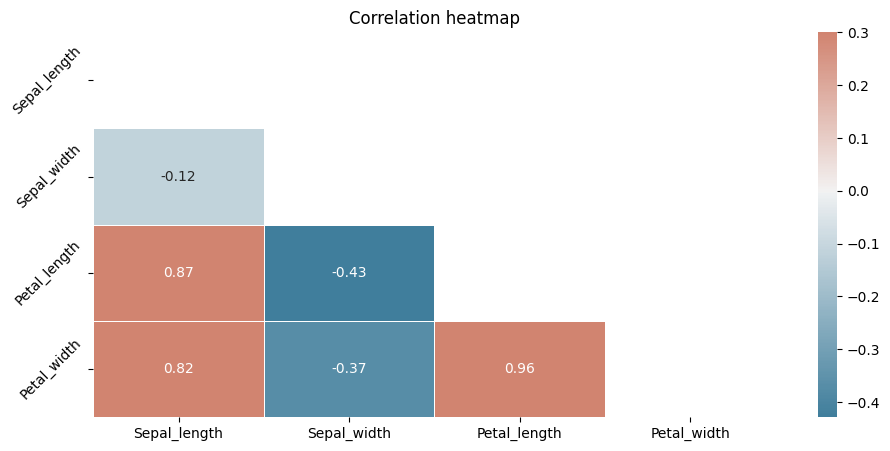

In [45]:
iris_corr = data[['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(iris_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 5))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

sb.heatmap(iris_corr,
           annot=True,
           linewidth=.5,
           center=0,
           mask=mask,
           cmap=cmap, vmax=.3)
plt.yticks(rotation=45)
plt.title('Correlation heatmap')

Comments:

- Sepal length is positively correlated with petal length (0.87) and petal width (0.82), and it is very high.
- Sepal width is negatively correlated with petal length and petal width, and it is moderate.

- Petal length and petal width are positively correlated (0.96).
- Sepal length and sepal width are negatively correlated (-0.12).